In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df_sleep = pd.read_csv('sleep_efficiency_scaled_temps_2.csv')
df_sleep

,Unnamed: 0,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Date,Max temp,Min temp
0,0,1,0.933333,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,1,0.6,2021-03-06,0.210863,0.105263
1,1,138,0.450000,1,2021-03-06 02:00:00,2021-03-06 09:00:00,7.0,0.77,22,65,13,0.50,0.000,0.0,1,0.6,2021-03-06,0.210863,0.105263
2,2,233,0.450000,0,2021-03-06 23:00:00,2021-03-06 04:00:00,5.0,0.87,22,65,13,0.25,0.125,0.2,0,0.0,2021-03-06,0.210863,0.105263
3,3,2,1.000000,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,1,0.6,2021-12-05,0.258786,0.355263
4,4,196,0.866667,0,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.67,23,23,54,0.50,0.250,1.0,0,0.0,2021-12-05,0.258786,0.355263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,447,436,0.516667,0,2021-02-12 22:00:00,2021-02-12 05:00:00,7.0,0.96,28,57,15,0.00,0.000,0.0,0,0.6,2021-02-12,0.073482,0.070175
448,448,437,0.833333,1,2021-06-10 21:30:00,2021-06-10 05:30:00,8.0,0.72,27,55,18,0.50,0.000,0.6,0,0.6,2021-06-10,0.744409,0.837719
449,449,446,0.350000,0,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,1.00,0.250,0.4,1,0.2,2021-11-16,0.386581,0.289474
450,450,448,0.300000,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,0,1.0,2021-11-13,0.396166,0.614035


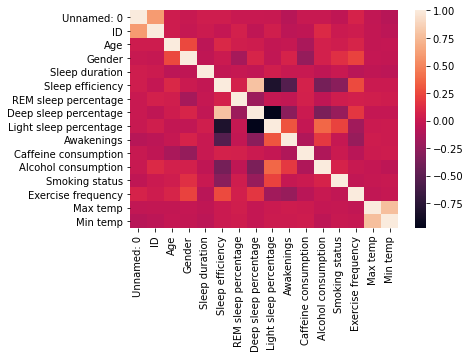

In [20]:
sns.heatmap(df_sleep.corr());

In [21]:
#pip install mlxtend --user

In [22]:
from sklearn.model_selection import train_test_split
X = df_sleep[['Age', 'Gender','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency', 'Min temp', 'Max temp']]
y = df_sleep['Sleep efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection Support Vector Regressor

In [23]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

from sklearn.svm import SVR

efs_SVR = ExhaustiveFeatureSelector(SVR(), 
           min_features=1,
           max_features=8,
           scoring='neg_mean_absolute_error',
           cv=3,
            print_progress=True)
efs_SVR = efs_SVR.fit(X_train, y_train)

Features: 255/255

In [24]:
# Display the best features that resulted from the feature selection
efs_SVR.best_feature_names_

('Age', 'Alcohol consumption', 'Smoking status', 'Exercise frequency')

# Feature Selection Linear Regression

In [25]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

from sklearn.linear_model import LinearRegression

efs_linear_regression = ExhaustiveFeatureSelector(LinearRegression(), 
           min_features=1,
           max_features=8,
           scoring='neg_mean_absolute_error',
           cv=3,
            print_progress=True)
efs_linear_regression = efs_linear_regression.fit(X_train, y_train)

Features: 255/255

In [26]:
# Display the best features that resulted from the feature selection
efs_linear_regression.best_feature_names_

('Age',
 'Caffeine consumption',
 'Alcohol consumption',
 'Smoking status',
 'Exercise frequency')

# Features Selection RandomForestRegressor

In [27]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

from sklearn.ensemble import RandomForestRegressor

efs = ExhaustiveFeatureSelector(RandomForestRegressor(), 
           min_features=1,
           max_features=8,
           scoring='neg_mean_absolute_error',
           cv=3,
            print_progress=True)
efs = efs.fit(X_train, y_train)

Features: 255/255

In [28]:
# Display the best features that resulted from the feature selection
efs.best_feature_names_

('Age',
 'Caffeine consumption',
 'Alcohol consumption',
 'Smoking status',
 'Exercise frequency')

In [29]:
efs.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([-0.12089879, -0.11119262, -0.10281391]),
  'avg_score': -0.11163510610736532,
  'feature_names': ('Age',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-0.12209476, -0.11046867, -0.11206875]),
  'avg_score': -0.11487739344649273,
  'feature_names': ('Gender',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([-0.12272479, -0.10928586, -0.11386799]),
  'avg_score': -0.1152928794651877,
  'feature_names': ('Caffeine consumption',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([-0.10796433, -0.09746202, -0.09703692]),
  'avg_score': -0.10082108754942742,
  'feature_names': ('Alcohol consumption',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([-0.11933774, -0.11014995, -0.10906225]),
  'avg_score': -0.11284997773570792,
  'feature_names': ('Smoking status',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([-0.11312902, -0.10159261, -0.10878526]),
  'avg_score': -0.10783563178803778,
  'feature_names': ('Exercise frequency',)},
 6:

In [30]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',